---
## Give your presentation a title
title: "My Jupyter Notebook Presentation"
## Choose a reveal.js theme, options are available at https://revealjs.com/themes/
theme: "beige"
## Add a main CSS file
---
<!-- <link rel="stylesheet" type="text/css" href="{{ filename='main.css') }}"> -->
<!-- Import Bootstrap styles -->
<!-- <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css"> -->


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend= "plotly"
pd.set_option('display.max_columns', 150, 'display.max_rows', 100, 'display.max_colwidth', 15)
%matplotlib inline 

In [5]:
#!jupyter nbconvert --to markdown --output mymarkdownfile.md Anamoly_detection_credit_card.ipynb
#!jupyter nbconvert --to slides --output mymarkdownfile.html Anamoly_detection_credit_card.ipynb
#!jupyter nbconvert --to slides --post serve Anamoly_detection_credit_card.ipynb
#!jupyter nbconvert --to slides --execute Anamoly_detection_credit_card.ipynb

# What is PCA

PCA (Principal Component Analysis) is a technique to find a low-dimensional representation of a dataset that captures as much variation as possible. It seeks a small number of dimensions that are interesting and informative, where each dimension is a linear combination of the original features. The first principal component is a normalized linear combination of the features that has the largest variance. It can be found through an optimization problem, and the resulting loadings and scores make up the principal component loading vector. PCA is useful when the original dataset has a large number of features, making it difficult to visualize and analyze.

# Introduction 

* In the real world, fraud often goes undiscovered, and only the fraud that is caught provides any labels for the datasets. 

* Moreover, fraud patterns change over time, so supervised systems that are built using fraud labels become stale, capturing historical patterns of fraud but failing to adapt to newly emerging patterns.

* For these reasons (the lack of sufficient labels and the need to adapt to newly emerging patterns of fraud as quickly as possible), unsupervised learning fraud detection systems are in vogue.

* In this notebook, we will build such a solution using PCA 

In [6]:
# load dataset
df = pd.read_csv('/Users/waleedidrees/Dropbox/Python_Projects/books/handson-unsupervised-learning-master/datasets/credit_card_data/credit_card.csv').rename(columns= {"Class":"target"})
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/waleedidrees/Dropbox/Python_Projects/books/handson-unsupervised-learning-master/datasets/credit_card_data/credit_card.csv'

In [ ]:
df.columns= df.columns.str.lower()
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Disable the warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## we see that fraudulent transactions are very rare and this makes the data very imbalanced

In [ ]:
df["target"].value_counts().reset_index()
#492/284315

0.0017304750013189597

we have 284,807 credit card transactions in total, of which 492 are fraudulent, with a positive (fraud) label of one. The rest are normal transactions, with a negative (not fraud) label of zero.
We have 30 features to use for anomaly detection—time, amount, and 28 principal components. And, we will split the dataset into a training set (with 190,820 transactions and 330 cases of fraud) and a test set
(with the remaining 93,987 transactions and 162 cases of fraud)

In [ ]:
(
df["target"]
.value_counts()
.reset_index()
.plot.bar(x="index", y= "target", color="index", height= 800, width= 800)
 )

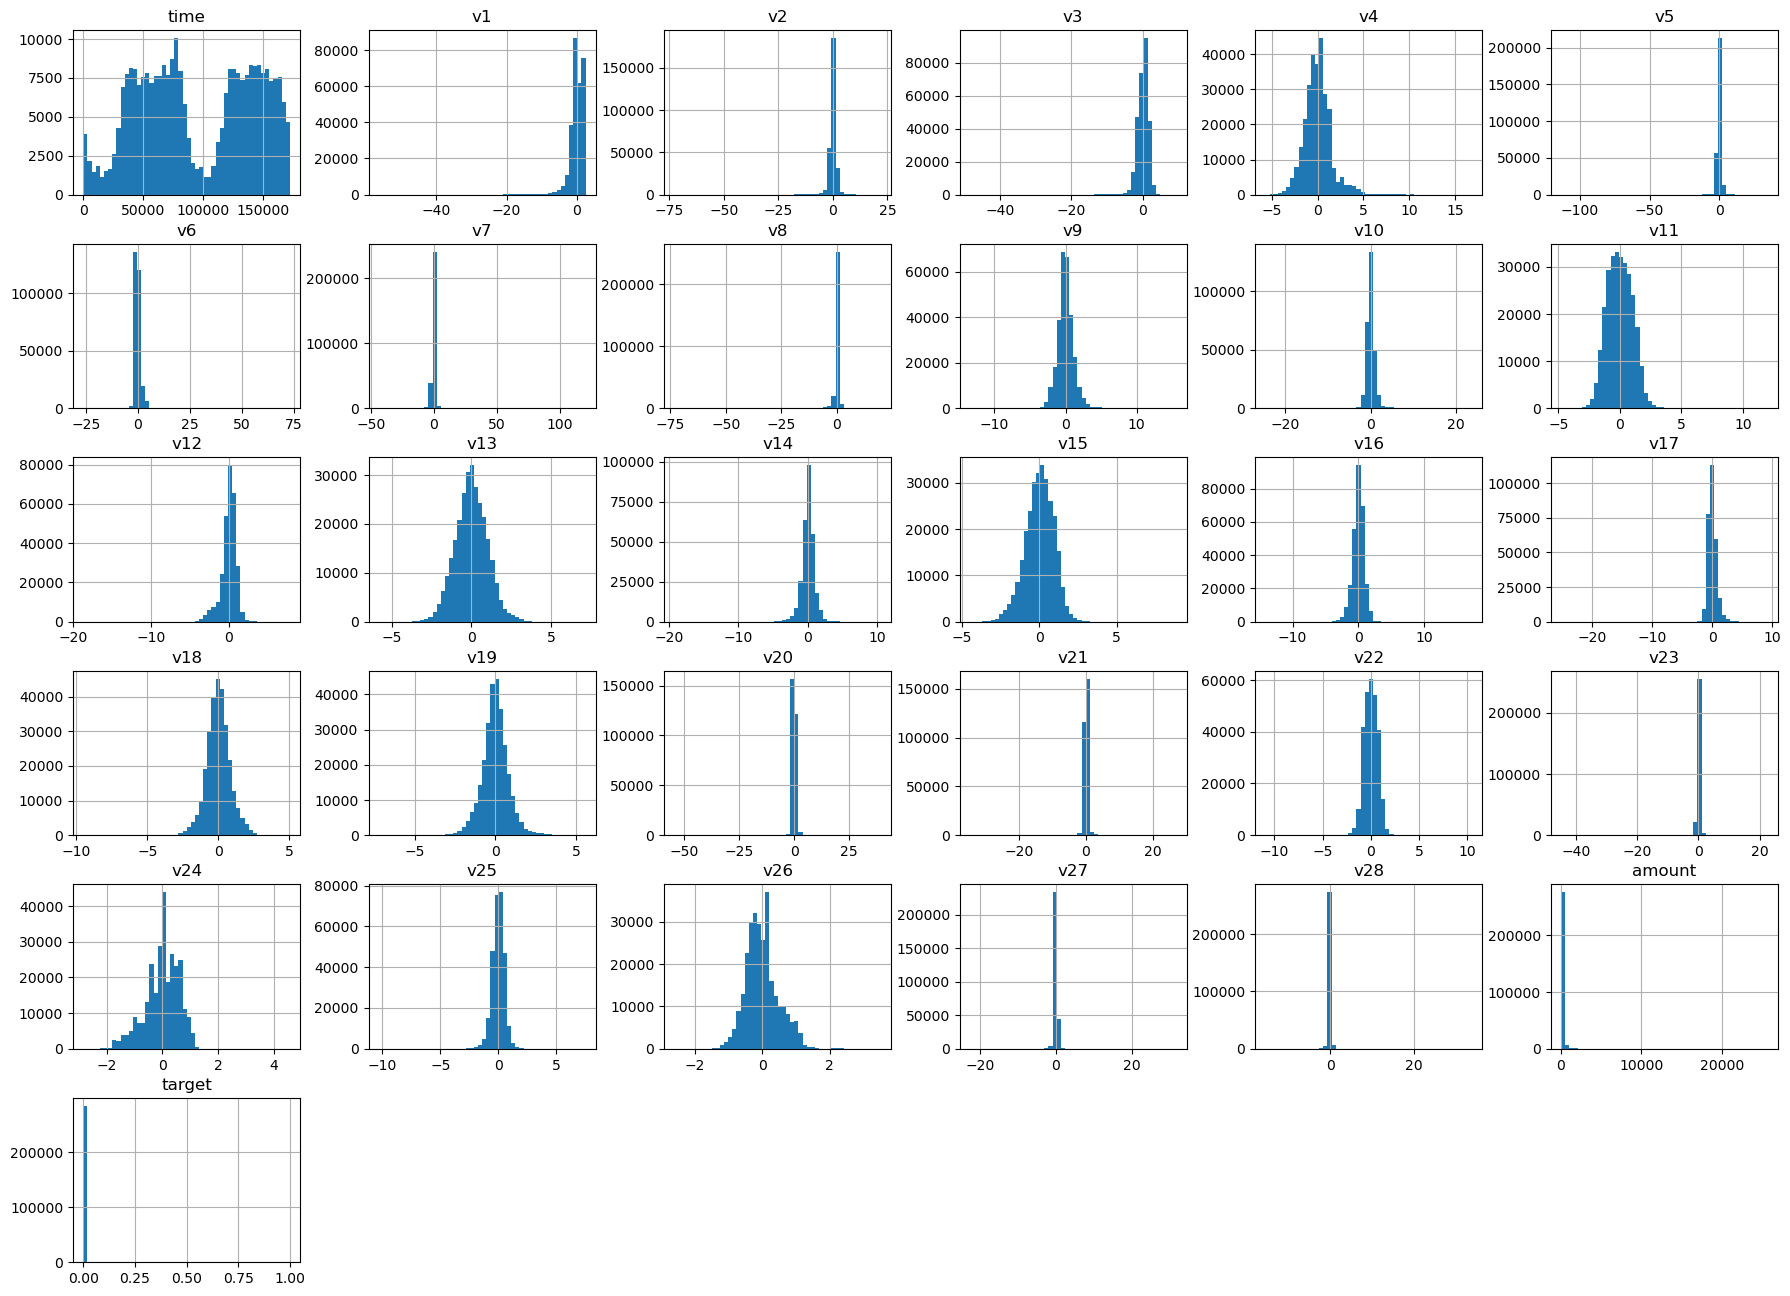

In [ ]:
pd.options.plotting.backend = "matplotlib"

df.hist(figsize= (22,16), bins=50)

pd.options.plotting.backend = "plotly"

## Methodology

Since this an unsupervised learning problem and we will not be using the labels so we need find a way to measure the performance of the anamoly model.  Dimensionality reduction algorithms reduce the dimensionality of data while attempting to minimize the reconstruction error. However, these dimensionality reduction algorithms cannot capture all the information of the original features as they move to a lower dimensional space; therefore, there will be some error as these algorithms reconstruct the reduced feature set back to the original number of dimensions.
we will use these errors and make a function to compare them to the original dataframe and measure the score. 
we make our performance measure as follows:

* We take the difference between the original vs the pca dataframe which we created from pcs components using inverse transformation
* then we transform the difference using min max scaller from 0 to 1 scale
* we can consider this score as probability score and use this against the labels to calculate, precision, recall and threshhold using sklearn precision recall curve metric. 
* We will take x number of highest scores as our anomolies
* we can all also calculate average precision score using the average precision score metric.

# Define evaluation functions

In [ ]:
# Calculate reconstruction error
def anomalyScores(originalDF, pca_df):
    loss = ((originalDF.values- pca_df.values)**2).sum(axis=1)    
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

# Train-test splits
We will remove the target variable and we will not be using it for training but we will use it to evaluate the anamolies by attaching it to anamoly scores

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(df.drop(columns="target").copy(), df["target"], test_size = 0.33,stratify=df["target"],  random_state = 2018 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((190820, 30), (190820,), (93987, 30), (93987,))

The train data has 330 Fraudulent transaction and 190490 normal transactions

In [ ]:
y_train.value_counts()

0    190490
1       330
Name: target, dtype: int64

# Lets create Preprocessing Pipiline
* all our variables are numeric we will standardise data and then as for PCA we must standardise observations.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [ ]:
num_pipe= Pipeline ( steps=[
    ("std", StandardScaler()),
    ("impute", KNNImputer()), 
    ])

In [ ]:
all_cols= X_train.columns
prep= ColumnTransformer([
    ("n", num_pipe, all_cols)
    ]).set_output(transform= "pandas")
prep.fit_transform(X_train).head()

,n__time,n__v1,n__v2,n__v3,n__v4,n__v5,n__v6,n__v7,n__v8,n__v9,n__v10,n__v11,n__v12,n__v13,n__v14,n__v15,n__v16,n__v17,n__v18,n__v19,n__v20,n__v21,n__v22,n__v23,n__v24,n__v25,n__v26,n__v27,n__v28,n__amount
142087,-0.217345,-1.008613,1.168013,0.203077,-0.252933,-0.387030,-0.051340,-0.191393,0.917626,-0.220348,0.379391,0.891953,0.652099,-0.481673,0.888920,0.511094,0.459652,-0.178769,-0.131099,-0.030699,0.240351,-0.230649,-0.781406,0.154163,-0.584578,-0.161870,0.232116,0.525621,0.459397,-0.301324
165168,0.470628,0.071848,0.664025,-0.240845,-0.381091,0.694608,-0.633906,0.833474,-0.132701,-0.166967,-0.793682,-0.490992,0.366808,0.879055,-1.245368,-0.369767,0.316392,0.393419,-0.407275,-0.310150,0.099453,-0.438520,-1.037593,0.145573,1.078771,-0.761303,0.221753,0.564899,0.254973,-0.342346
235908,1.130719,0.099163,-0.387383,-0.945009,-1.493663,-0.092322,-0.878326,1.252531,-0.564372,-2.760963,0.979945,-0.734286,-0.940293,0.749094,0.176712,-1.084605,-2.049873,1.119388,-0.424709,0.039325,0.136822,0.597949,2.047828,0.533608,1.885871,-0.949325,0.195840,0.394576,0.789716,0.507010
148255,-0.110896,0.015486,0.519611,0.193472,-0.418969,0.316777,-0.774851,0.816615,-0.154107,-0.060485,-0.393037,-0.838072,0.229399,0.138905,0.095691,-0.404080,-0.180757,-0.428453,-1.022053,-0.193808,-0.038190,-0.336778,-0.738483,0.127711,-0.026519,-0.955999,0.297594,0.620507,0.285961,-0.333753
145672,-0.163731,0.009053,0.524138,0.175338,-0.335413,0.761346,0.501074,0.266188,0.187765,-0.186259,-0.837330,0.231244,0.693028,1.261985,-1.542311,-0.324732,1.234117,-0.316896,1.377317,0.854111,0.109213,-0.199423,-0.454902,0.047231,-0.725277,-2.181428,-0.147735,0.586351,0.739459,-0.337806


# Lets define Evaluation Function to measure the recall, precision and roc_auc score

In [ ]:
# Evaluation Functions
from sklearn.metrics import accuracy_score, recall_score ,average_precision_score, precision_recall_curve, precision_score, roc_auc_score,roc_curve, auc 
def eval_scores(actuals, pred):
    res= pd.DataFrame({ 
    "accuracy": [accuracy_score(actuals, pred)], 
    "recall": [recall_score(actuals, pred)],
    "roc_auc": [roc_auc_score(actuals, pred)],
    "precision": [precision_score(actuals, pred)]})    
    return res

# Define our PCA model pipeline and see if it works fine with custom Transformer 

In [ ]:
from sklearn.ensemble import IsolationForest

# isolation_forest = IsolationForest(random_state=42)
# outlier_pred = isolation_forest.fit_predict(X)

In [ ]:
#from sklearn import 
pipe= Pipeline(steps=[
    ("preprocess", prep),    
    ('model', IsolationForest(random_state=2018, n_estimators=100, contamination= .01, max_features= .75))        
    ]
    ).set_output(transform="pandas")

pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('n',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   KNNImputer())]),
                                                  Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object'))])),
                ('model',
                 IsolationForest(contamination=0.01, max_features=0.75,
                                 random_state=2018))])

In [ ]:
df_anomaly= X_train.copy()
df_anomaly['scores']= pipe.decision_function(X_train)
df_anomaly["anomalies"]= pipe.predict(X_train)
df_anomaly

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,anomolies,anamolies,scores,anomalies
142087,84575.0,-1.981958,1.933460,0.305345,-0.356982,-0.533313,-0.065841,-0.238248,1.113825,-0.242343,0.412512,0.909529,0.647395,-0.479646,0.849723,0.468266,0.402417,-0.149496,-0.107187,-0.024448,0.184048,-0.171607,-0.568387,0.098089,-0.355334,-0.084147,0.111366,0.212020,0.156344,13.99,1,1,0.203620,1
165168,117245.0,0.141365,1.098390,-0.366686,-0.538319,0.965420,-0.844916,1.037264,-0.164037,-0.183759,-0.860538,-0.500042,0.363545,0.875323,-1.188768,-0.338717,0.277181,0.332780,-0.338180,-0.252215,0.075614,-0.328000,-0.754674,0.092707,0.653494,-0.397063,0.106378,0.227831,0.086810,3.87,1,1,0.207180,1
235908,148591.0,0.195044,-0.643710,-1.432682,-2.112563,-0.124961,-1.171783,1.558808,-0.689223,-3.030623,1.064250,-0.748020,-0.936953,0.745912,0.169482,-0.993601,-1.791372,0.944674,-0.352762,0.032625,0.104373,0.451796,1.488893,0.335824,1.143004,-0.495214,0.093904,0.159268,0.268700,213.40,1,1,0.124318,1
148255,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,-0.425748,-0.853804,0.226830,0.138305,0.092097,-0.370153,-0.157419,-0.359946,-0.852382,-0.157390,-0.030316,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,1,1,0.212318,1
145672,87121.0,0.017960,0.866609,0.263352,-0.473687,1.057894,0.672911,0.331240,0.225852,-0.204932,-0.907905,0.236099,0.688117,1.256632,-1.472383,-0.297459,1.079442,-0.265918,1.154454,0.696719,0.083125,-0.148114,-0.330969,0.031092,-0.440669,-1.138396,-0.071485,0.236466,0.251605,4.99,1,1,0.191565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,35743.0,-0.488687,0.166906,1.379606,-0.975304,-0.537877,-1.291099,0.500367,-0.353419,-1.452776,0.208791,-0.006428,-0.143034,0.786791,-0.502108,-0.563756,0.224719,0.765352,-1.778161,0.794505,0.088819,0.271219,0.877504,-0.041547,0.985516,0.327752,-0.145530,-0.044476,0.018997,28.00,1,1,0.170094,1
195475,131077.0,-0.497686,-4.552162,-3.158123,1.019695,-1.063958,0.058374,1.666589,-0.369512,0.309615,-0.229775,0.284636,-0.327934,-1.627351,1.268998,0.384672,0.657418,-0.757643,0.899814,-0.173713,2.445691,1.013100,-0.160851,-1.137851,0.370216,-0.451032,0.625165,-0.364470,0.150407,1340.41,1,1,0.101959,1
48687,43742.0,0.207689,-1.867709,-0.713193,0.221505,-0.764161,-0.501496,0.809238,-0.338811,0.225005,-0.470414,-0.978353,-0.121359,0.113195,0.398387,1.207252,0.545421,-0.538732,-0.241905,0.294028,1.155351,0.072422,-1.151118,-0.515197,-0.375966,0.057042,0.835926,-0.202497,0.099087,599.00,1,1,0.163242,1
159608,112716.0,0.109095,0.820418,-0.149979,-0.825409,0.893693,-0.524624,1.002682,-0.138959,0.034570,-0.411872,-1.867236,-0.240419,0.129672,0.063090,-0.319994,0.213897,-0.783230,-0.399569,0.307070,0.001718,-0.326690,-0.768341,-0.046445,-1.012910,-0.350652,0.202805,0.243677,0.087102,8.08,1,1,0.199557,1


In [ ]:
df_anom_top= df_anomaly.sort_values("scores").head(350)
df_anom_top

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,anomolies,anamolies,scores,anomalies
39769,39954.0,-56.407510,-72.715728,-6.605265,16.491217,34.801666,-26.160506,-19.399981,-1.501300,6.967698,9.537780,3.089395,1.776452,3.732744,-2.530792,5.784514,3.903988,-1.929314,0.206699,2.805883,-12.360962,-6.266878,-1.272167,7.893082,0.767805,5.376595,0.163672,-8.358317,33.847808,1201.83,-1,-1,-0.181795,-1
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,-1,-1,-0.180410,-1
121787,76318.0,-22.594958,-18.185294,-9.164820,8.464731,-10.335665,7.521470,10.145492,-3.394426,5.025957,4.678281,0.524518,-0.133233,1.483031,-3.123475,1.934128,3.106925,-1.128033,-0.474485,2.411694,-10.349613,-4.705954,-0.695902,-11.359689,-0.342331,-0.805144,0.091900,-3.141773,6.341989,1729.79,-1,-1,-0.172163,-1
176335,122723.0,-35.274010,-34.889342,-15.070015,9.211564,-6.226835,3.828063,10.778805,-6.462003,6.588395,4.524278,3.556634,1.445127,3.048211,-2.463534,4.970057,4.516603,-1.784110,-3.839299,0.356394,-15.595737,-7.090340,-4.722186,-26.429741,1.765486,-4.564506,-0.594620,1.110848,-0.714247,1676.60,-1,-1,-0.171266,-1
6812,8592.0,-23.066842,-25.640527,-3.080313,4.866932,6.901397,-4.074335,2.027345,-2.688652,3.402966,2.881873,3.236837,-2.889369,4.465413,-1.550096,1.928388,3.930881,-1.352591,-0.988008,2.693421,-13.276034,-5.378106,3.312971,13.876221,-0.572177,5.525093,0.906980,3.358822,3.553906,845.73,-1,-1,-0.169448,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,7.182967,-9.445943,-0.314620,-12.991466,-0.136359,-6.367524,-12.734394,-3.845130,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,-1,-1,-0.078589,-1
141257,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,7.182967,-9.445943,-0.314620,-12.991466,-0.136359,-6.367524,-12.734394,-3.845130,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,-1,-1,-0.078589,-1
15168,26525.0,-3.156608,-2.895171,3.300964,1.550562,16.160824,-8.710536,-17.936966,0.492347,1.851809,3.333234,2.098537,2.723363,-1.236551,1.274733,2.228561,-1.469456,2.117834,-2.827846,-1.173909,-1.444388,0.831647,-4.120410,-26.751119,0.002922,-7.495741,-0.376964,1.811647,1.056891,8.94,-1,1,-0.078536,-1
230962,146557.0,-21.063552,-31.874838,0.836133,6.786884,29.162172,-20.367836,-20.906651,2.665022,2.736887,2.501868,0.143083,2.982447,0.778202,1.549452,0.042256,-0.508766,-0.208436,1.349428,0.197868,7.889272,3.119319,-0.020074,6.079396,0.775017,-0.619492,1.123455,-0.847251,0.952055,1.00,-1,-1,-0.078492,-1


In [ ]:
preds= df_anomaly.assign(class_= np.where(df_anomaly.index.isin(df_anom_top.index), 1,0))[["class_"]]
preds

,class_
142087,0
165168,0
235908,0
148255,0
145672,0
...,...
30023,0
195475,0
48687,0
159608,0


## Seems like its working as intended

* If we use PCA to generate the same number of principal components as the number of original features, will we wont be able to detect anamolies successfuly. When the number of principal components equals the number of
original dimensions, PCA captures nearly 100% of the variance/information in the data as it generates the principal components, and will have very little error. We will not be able to differentiate between rare transactions and normal ones—in other
words, anomaly detection will be poor.
* so lets run PCA for 20 to 30 components and see what number gives us best performance.

* we can see from the Score above that 27 PCA components are the solution for this model and the Recall is .79 and precision is .74 with roc_auc of almost 0.9

In [ ]:
# pipe.set_params(**{"model__estimator__n_components": 27})
# pipe.fit(X_train)
eval_scores(y_train, preds )

,accuracy,recall,roc_auc,precision
0,0.997537,0.318182,0.658448,0.3


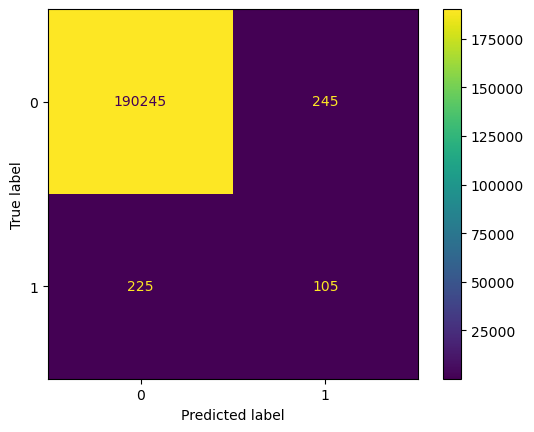

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, preds, labels= y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= y_train.unique())
disp.plot()
plt.show()

* This results is impressive considering its a unsupervised model we managed to etect 261 out of 330 fraudulent transactions.